# 10 | Independent coding: Interest points II
**ES143 Computer Vision, Harvard University, Fall 2020**

This is an independent coding task. In it you will learn to:
* match interest points between images
* visualize matching results

This notebook is a subset of the one you started during the Class Session on Th 11/7 but did not have time to complete. It requires the datafile `quad.zip`, which is available on the course website.

## Instructions:
1. Run the notebook
2. Read it and follow the instructions, posting snapshots to [padlet](https://padlet.com/zickler/sift) as directed.
3. Submit `.ipynb` and `.html` versions of this notebook to [canvas](https://canvas.harvard.edu/courses/78234/assignments/420410). Submission filenames should be of the form `sift2_lastname_firstname.ipynb` and `sift2_lastname_firstname.html`.

In [1]:
# Import any required libraries here
import cv2                   # OpenCV
import numpy as np           # numpy

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Extract zip file 
! unzip -n ./quad.zip

Archive:  ./quad.zip


## Detecting SIFT Interest Points

The follow cell detects and displays the interest points in an image. It is a copy of the task you already completed in class. 

(-0.5, 639.5, 479.5, -0.5)

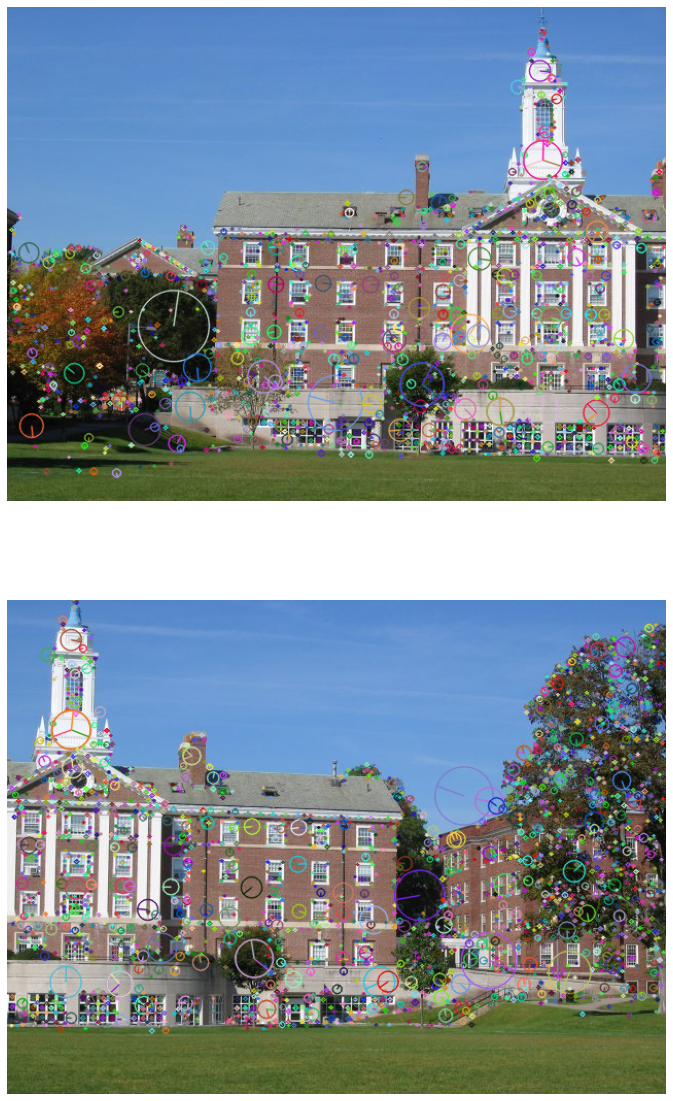

In [3]:
# Load two images and convert to grayscale
im1 = cv2.cvtColor(cv2.imread('./quad/quad_left.jpg'), cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(cv2.imread('./quad/quad_middle.jpg'), cv2.COLOR_BGR2RGB)
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Use the detectAndCompute method of this SIFT object to 
#  detect SIFT keypoints and compute descriptor for each one
keypoints1, descriptors1 = sift.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(im2_gray, None)

# Create new images that include visualizations of the detected interest points
# Note: Due to a quirk in openCV, the third argument (which the documentation
#       says should be the output image) is ignored so can be set to None.
imKeypoints1=cv2.drawKeypoints(im1,
                              keypoints1,
                              None,
                              flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imKeypoints2=cv2.drawKeypoints(im2,
                              keypoints2,
                              None,
                              flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f, (ax1,ax2) = plt.subplots(2,1,figsize=(15,20))
ax1.imshow(imKeypoints1)
ax1.axis('off')
ax2.imshow(imKeypoints2)
ax2.axis('off')

## Work Here: Matching Interest Points

### Instructions
1. Run the cell, read the code, examine the resulting images. We will discuss the code together before moving on.
2. Read the [Feature Matching portion of the OpenCV tutorial](https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html), ignoring the section called **FLANN based Matcher**.
3. Based on that tutorial's code for **Brute-Force Matching with ORB Descriptors**, add code at line 12 below that: (i) sorts the matches according to matching distance; and (ii) keeps and displays only the top `GOOD_MATCH_PERCENT`% of matches.
4. Through trial and error, find a value of `GOOD_MATCH_PERCENT` that is a good balance between providing many good matches while also limiting the ratio of bad matches to good ones.
5. Post a snapshot of your resulting image to [padlet](https://padlet.com/zickler/sift), including your name in the title of your post.

In [5]:
# Create a "brute force" matcher object using the L2 norm,
#  and using "cross check" to only keep symmetric matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Use the match method of this matcher object to match 
#   descriptors between images
matches12 = bf.match(descriptors1, descriptors2)

(-0.5, 1279.5, 479.5, -0.5)

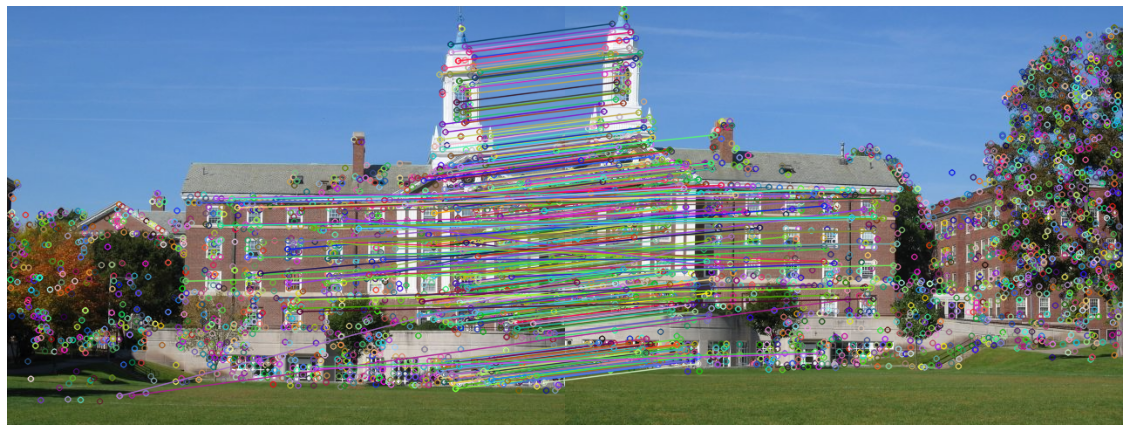

In [20]:
# WORK HERE: Add code afterr line 12 to keep and display only 
#   the GOOD_MATCH_PERCENT percent of matches
GOOD_MATCH_PERCENT= 0.50
numGoodMatches = int(len(matches12) * GOOD_MATCH_PERCENT)

matches12 = sorted(matches12, key = lambda x: x.distance)[:numGoodMatches]

# good = []

# for match in matches12:
#     print(match.__dict__)

# for m, n in matches12:
# #     print(match)
#     if m.distance < 0.75*n.distance:
#         good.append([m])



# Display matches
imMatches = cv2.drawMatches(im1, 
                            keypoints1,
                            im2,
                            keypoints2, 
                            matches12, 
                            None)

fig,ax = plt.subplots(figsize=(20,15))
ax.imshow(imMatches)
ax.axis('off')